# Example use of the Sonic module ETL_Evo.jl

This notebook is part of the technical documentation of Sonic.

In [63]:
import DataFrames, Dates, Random, StatsPlots

In [64]:
import Pkg                      # package manager
Pkg.activate("../../../")       # Project.toml
Pkg.instantiate()               # https://julialang.github.io/Pkg.jl/v1.0/index.html

Activating environment at `~/Documents/Calendar/Work/Noda/Code/Sonic.jl/Project.toml`


In [65]:
include("../../../src/ETL_Evo.jl")
ETL = ETL_Evo

Main.ETL_Evo

Get config from outside version control,

In [66]:
include("src/config.jl")
() # don't echo config

()

Download from remote database,

In [67]:
@time if false # toggle; this can take time
    ETL.download(
        config,
        Dates.DateTime("2019-01-01"),
        Dates.DateTime("2020-01-01"),
    )
end

  0.000001 seconds (4 allocations: 160 bytes)


Extract and transform,

In [68]:
@time if false # toggle; this can take time
    ETL.transform(
        config,
    )
end

  0.000001 seconds (4 allocations: 160 bytes)


Load,

In [69]:
@time data = ETL.load(config)
length(data)

  6.694556 seconds (395.76 k allocations: 1.129 GiB, 16.97% gc time)


1639

Pick a substation at random,

In [70]:
key = collect(keys(data))[Random.rand(1 : end)]

"96abcd24-3277-44c4-9b79-d993be3a1dda"

Show dataframe,

In [71]:
data[key]

,datetime,energy,flow,power,return,supply,volume
,Dates…,Float64⍰,Float64⍰,Float64⍰,Float64⍰,Float64⍰,Float64
1,2019-01-01T00:00:00,223142.0,0.22,9.5,39.0,77.0,5283.41
2,2019-01-01T01:00:00,223153.0,0.249,9.8,40.0,74.0,5283.68
3,2019-01-01T02:00:00,223163.0,0.349,14.1,38.0,73.0,5283.93
4,2019-01-01T03:00:00,223174.0,0.224,8.4,41.0,72.5,5284.2
5,2019-01-01T04:00:00,223184.0,0.317,12.3,39.0,72.0,5284.45
6,2019-01-01T05:00:00,223200.0,0.57,26.3,34.0,74.0,5284.85
7,2019-01-01T06:00:00,223226.0,0.545,25.2,34.5,74.5,5285.4
8,2019-01-01T07:00:00,223252.0,0.551,25.4,35.0,75.0,5285.97
9,2019-01-01T08:00:00,223278.0,0.555,25.6,34.5,74.6667,5286.54


Plot some graphics,

In [72]:
using StatsPlots
ENV["GKSwstype"] = "100"
gr(fmt = :png)

Plots.GRBackend()

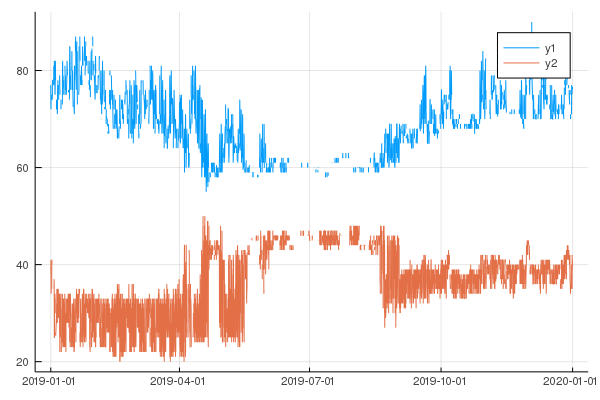

In [73]:
@df data[key] plot(
    :datetime,
    [
        :supply,
        :return,
    ],
)

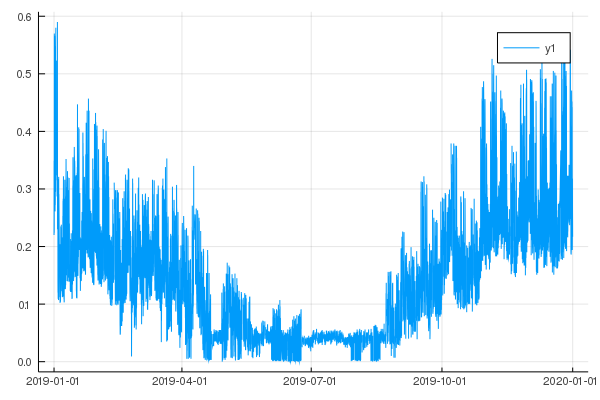

In [74]:
@df data[key] plot(:datetime, [:flow])

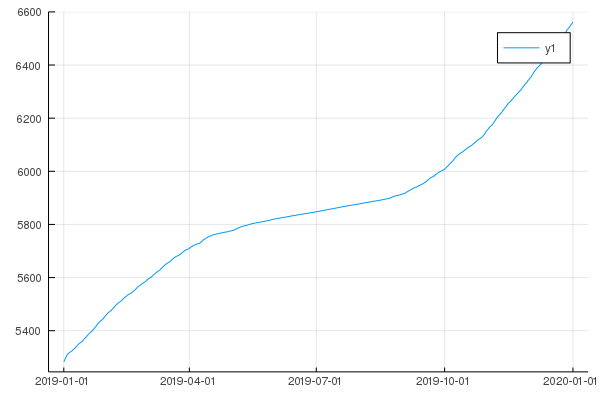

In [75]:
@df data[key] plot(:datetime, [:volume])

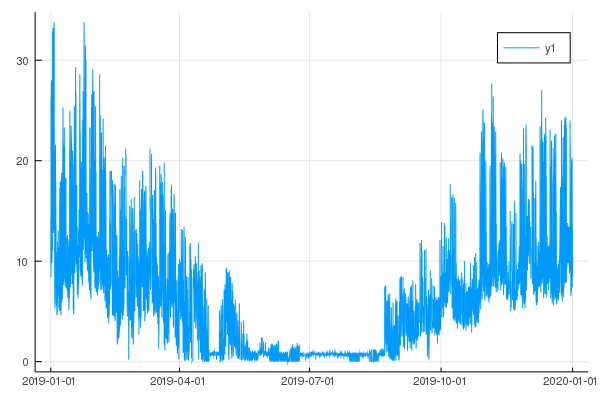

In [76]:
@df data[key] plot(:datetime, [:power])

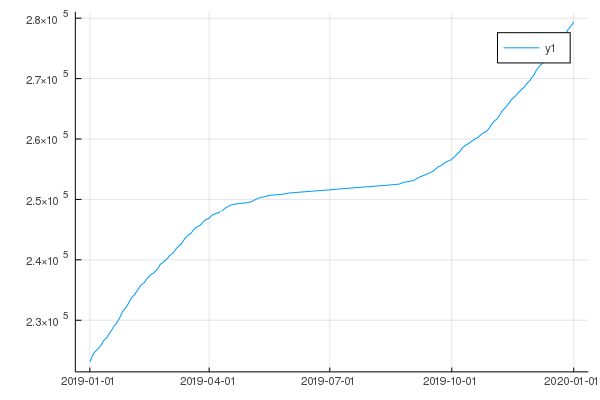

In [77]:
@df data[key] plot(:datetime, [:energy])